In [1]:
#importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix,mean_absolute_error,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [2]:
#reading datset with pandas
data=pd.read_csv(r"C:\Users\Hi\Downloads\HR-Employee-Attrition.csv")

In [3]:
data.shape

(1470, 35)

In [9]:
#top 5 rows
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [10]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [32]:
#descriptive statistics for numerical columns
data.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [35]:
data.select_dtypes(include=['number']).skew()

Age                         0.413286
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [36]:
data.select_dtypes(include=['number']).kurt()

Age                        -0.404145
DistanceFromHome           -0.224833
Education                  -0.559115
EnvironmentSatisfaction    -1.202521
JobInvolvement              0.270999
JobLevel                    0.399152
JobSatisfaction            -1.222193
MonthlyIncome               1.005233
NumCompaniesWorked          0.010214
PercentSalaryHike          -0.300598
PerformanceRating           1.695939
RelationshipSatisfaction   -1.184814
StockOptionLevel            0.364634
TotalWorkingYears           0.918270
TrainingTimesLastYear       0.494993
WorkLifeBalance             0.419460
YearsAtCompany              3.935509
YearsInCurrentRole          0.477421
YearsSinceLastPromotion     3.612673
YearsWithCurrManager        0.171058
dtype: float64

<Axes: ylabel='Age'>

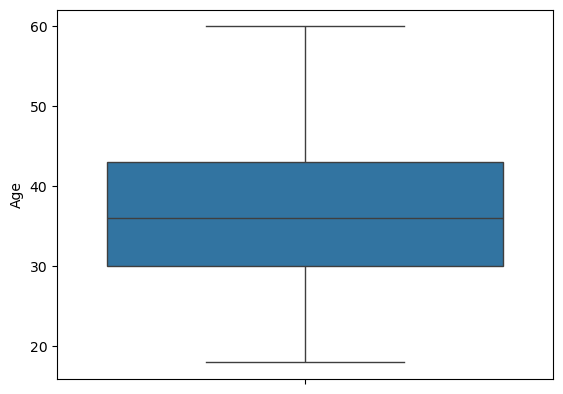

In [23]:
sns.boxplot(data['Age'])

<Axes: xlabel='DistanceFromHome'>

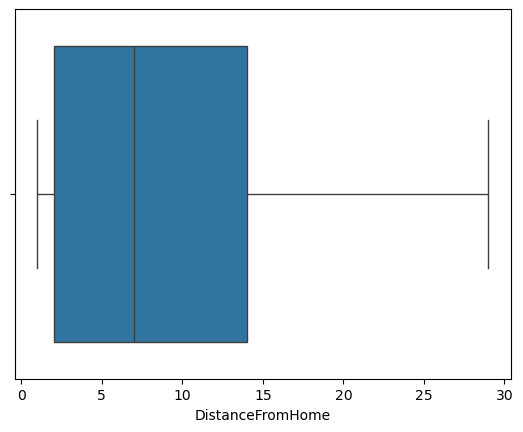

In [25]:
sns.boxplot(data['DistanceFromHome'],orient='h')

<Axes: xlabel='TotalWorkingYears'>

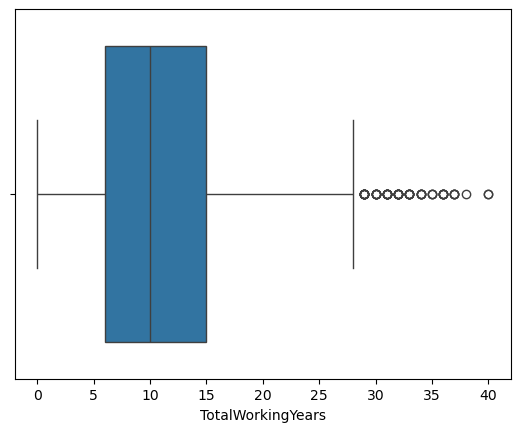

In [26]:
sns.boxplot(data['TotalWorkingYears'],orient='h')

<Axes: xlabel='MonthlyIncome'>

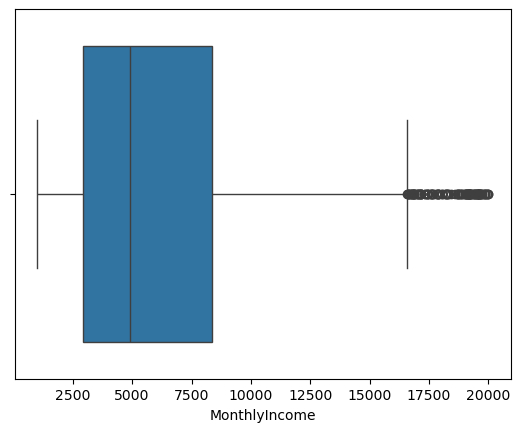

In [27]:
sns.boxplot(data['MonthlyIncome'],orient='h')

<Axes: xlabel='DistanceFromHome'>

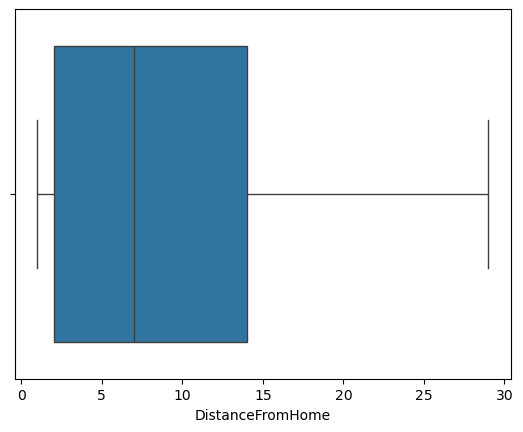

In [29]:
sns.boxplot(data['DistanceFromHome'],orient='h')

In [12]:
#dropping irrelevent columns
drop_cols = ['EmployeeCount', 'EmployeeNumber', 'StandardHours',
    'Over18', 'MonthlyRate', 'HourlyRate', 'DailyRate']

data.drop(columns=drop_cols, inplace=True)


Exploratory Data Analysis (EDA)


In [13]:
#missing values check
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [14]:
#duplicates
data.duplicated().sum()

np.int64(0)

<Axes: xlabel='YearsAtCompany'>

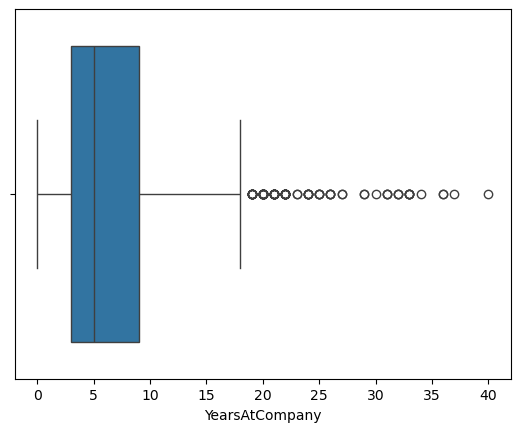

In [30]:
sns.boxplot(data['YearsAtCompany'],orient='h')

<Axes: xlabel='PercentSalaryHike'>

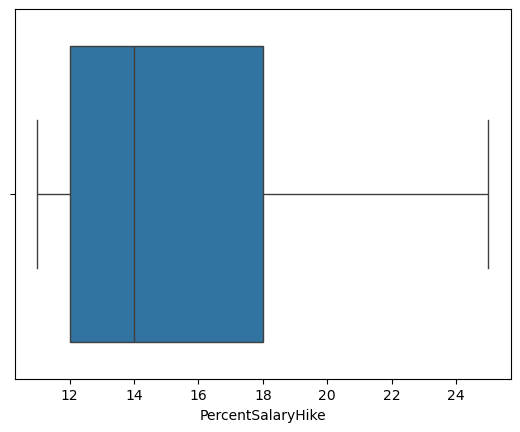

In [31]:
sns.boxplot(data['PercentSalaryHike'],orient='h')

<Figure size 5000x10000 with 0 Axes>

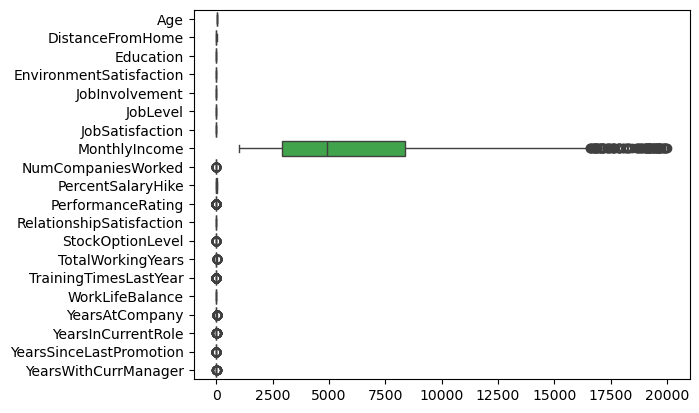

<Figure size 5000x10000 with 0 Axes>

In [51]:
sns.boxplot(data.select_dtypes(include=['number']),orient='h')
plt.figure(figsize=(50,100))


<Axes: >

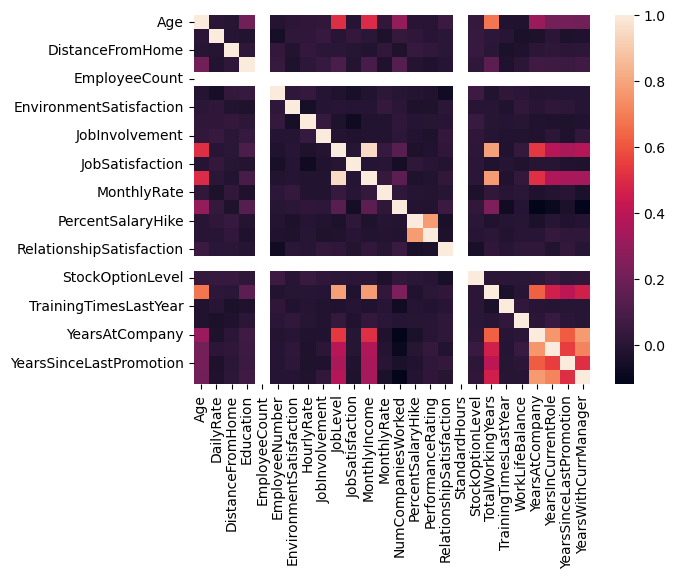

In [6]:
sns.heatmap(data.select_dtypes(include=['number']).corr())

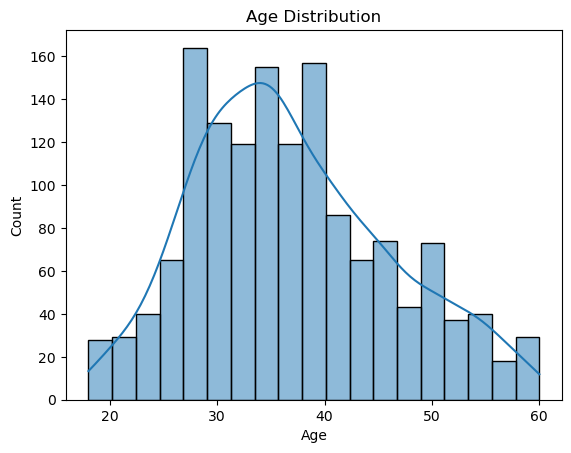

In [15]:
sns.histplot(data['Age'], kde=True)
plt.title("Age Distribution")
plt.show()


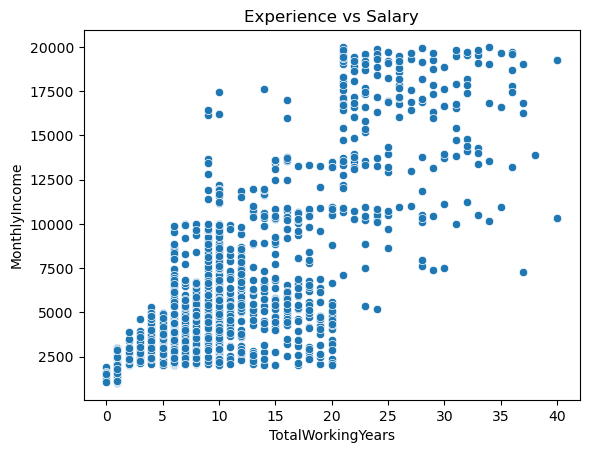

In [7]:
#scatter plot Total Working Years vs Salary
sns.scatterplot(x='TotalWorkingYears', y='MonthlyIncome', data=data)
plt.title("Experience vs Salary")
plt.show()


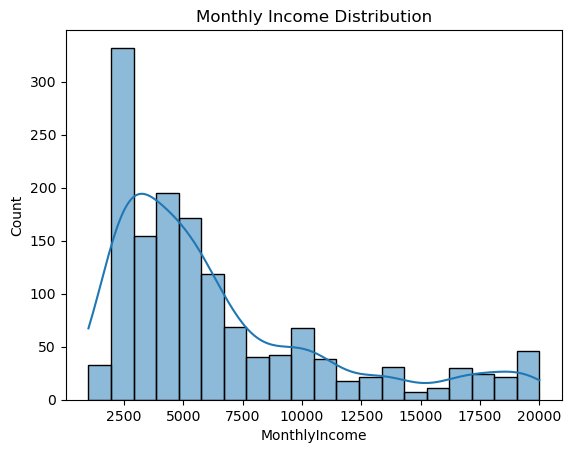

In [9]:
#Salary Distribution
sns.histplot(data['MonthlyIncome'],kde=True)
plt.title("Monthly Income Distribution")
plt.show()

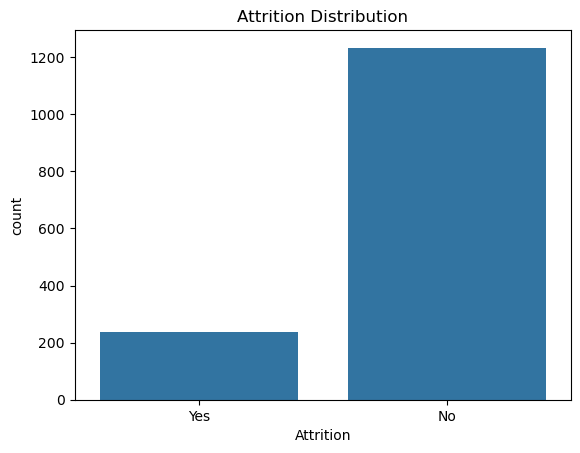

In [12]:
#Attrition Count
sns.countplot(x='Attrition', data=data)
plt.title("Attrition Distribution")
plt.show()


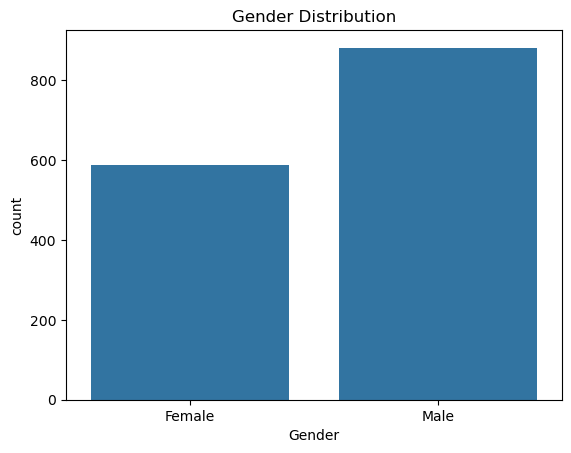

In [17]:
#gender distribution
sns.countplot(x='Gender', data=data)
plt.title("Gender Distribution")
plt.show()


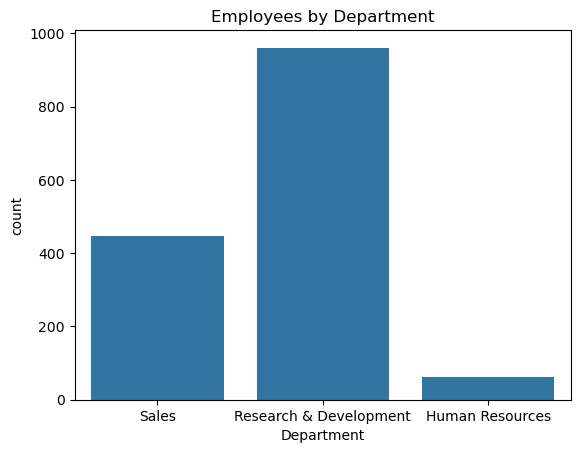

In [18]:
#Department-wise Employee Count
sns.countplot(x='Department', data=data)
plt.title("Employees by Department")
plt.show()


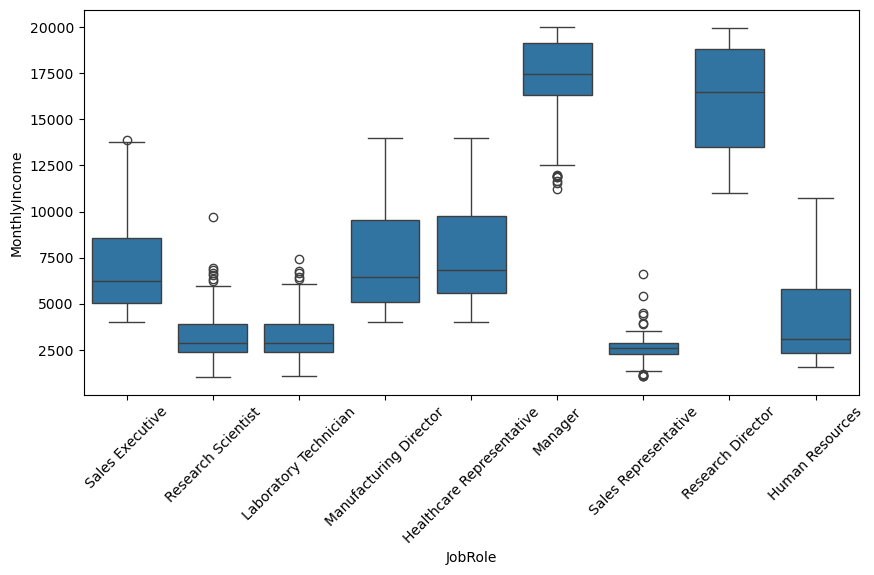

In [19]:
#job Role vs Salary
plt.figure(figsize=(10,5))
sns.boxplot(x='JobRole', y='MonthlyIncome', data=data)
plt.xticks(rotation=45)
plt.show()


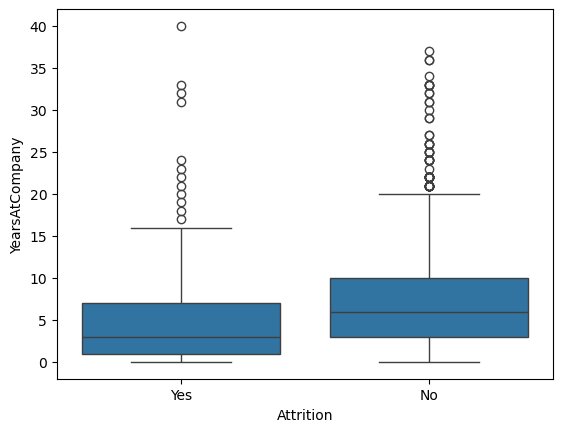

In [8]:
sns.boxplot(x='Attrition', y='YearsAtCompany', data=data)
plt.show()


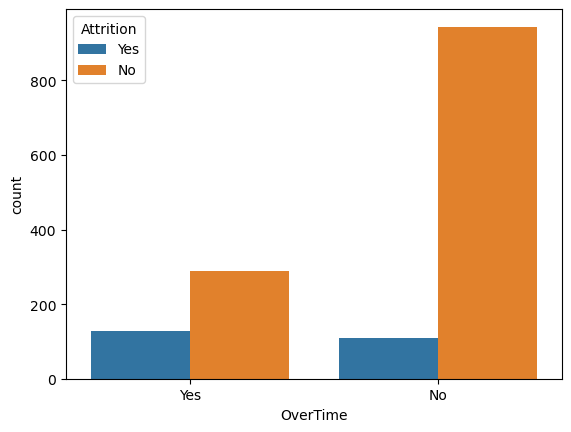

In [15]:
#countplot 'OverTime','Attrition'
sns.countplot(x='OverTime', hue='Attrition', data=data)
plt.show()


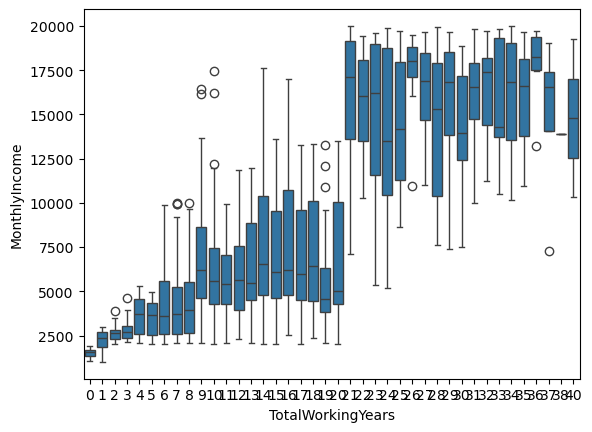

In [21]:
#boxplot for 'TotalWorkingYears', 'MonthlyIncome'
sns.boxplot(x='TotalWorkingYears', y='MonthlyIncome', data=data)
plt.show()

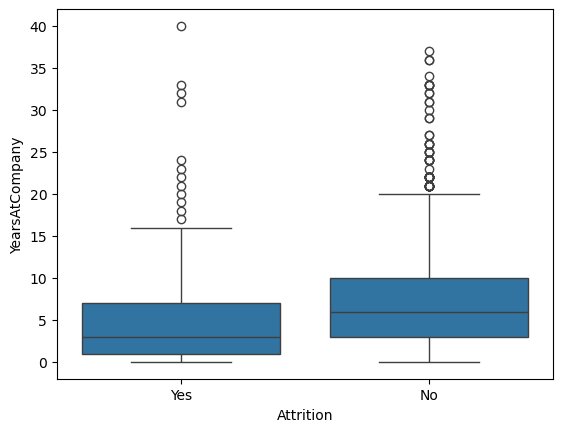

In [20]:
#Total Working Years vs Salary
sns.boxplot(x='Attrition', y='YearsAtCompany', data=data)
plt.show()


[]

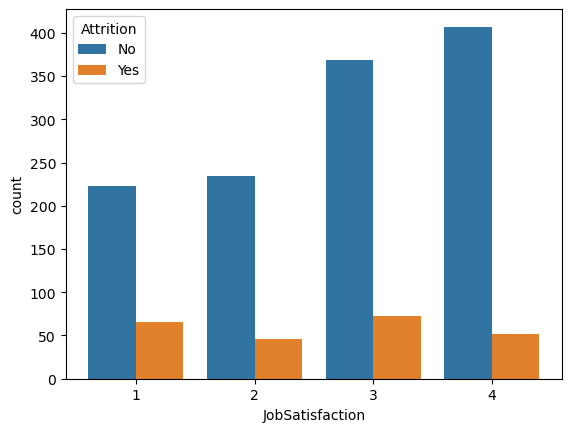

In [27]:

sns.countplot(x='JobSatisfaction',hue='Attrition',data=data)
plt.plot()

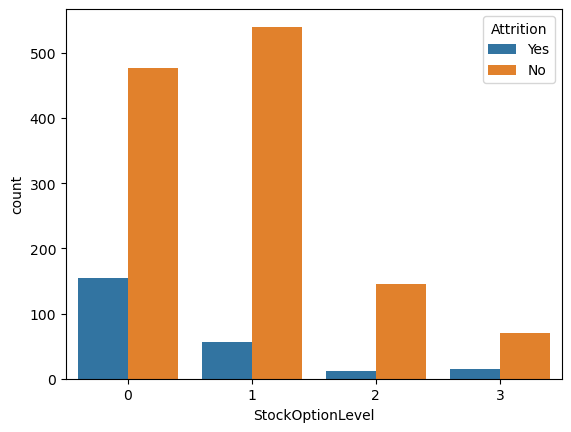

In [21]:
sns.countplot(x='StockOptionLevel', hue='Attrition', data=data)
plt.show()


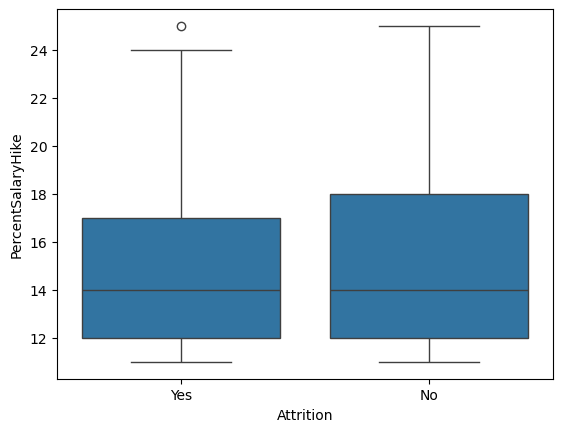

In [22]:
sns.boxplot(x='Attrition', y='PercentSalaryHike', data=data)
plt.show()


[]

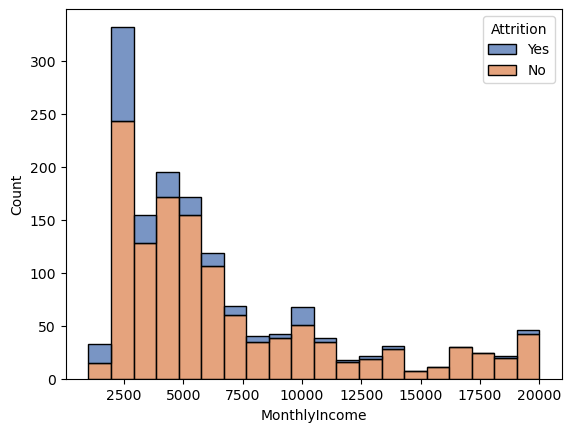

In [34]:
sns.histplot(x='MonthlyIncome',hue='Attrition',data=data,palette='deep',multiple='stack')
plt.plot()

[]

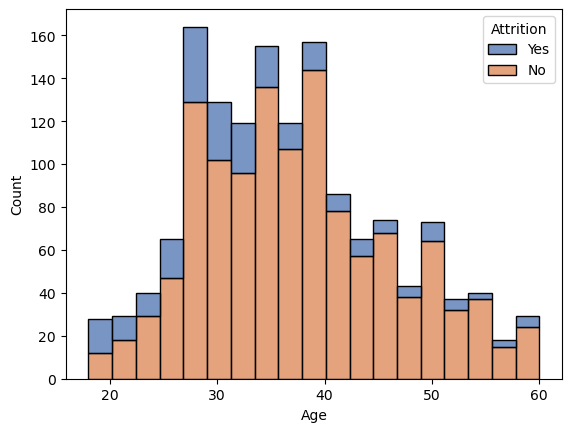

In [6]:
sns.histplot(x='Age',hue='Attrition',data=data,palette='deep',multiple='stack')
plt.plot()

In [ ]:
#Feature engineering
data['OverTimeFlag'] = data['OverTime'].map({'Yes': 1, 'No': 0})

data['PromotionGap'] = data['YearsAtCompany'] - data['YearsSinceLastPromotion']

data['SalaryPerYear'] = data['MonthlyIncome'] / (data['TotalWorkingYears'] + 1)


#MODEL1- Salary prediction based on role & experience

In [36]:
#strong features for predicting salary
strong_features = [
    'Age',
    'JobRole',
    'JobLevel',
    'Department',
    'Education',
    'EducationField',
    'TotalWorkingYears',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'PercentSalaryHike',
    'PerformanceRating'
]

data1=data[strong_features]


In [43]:
data1.head()

,Age,JobRole,JobLevel,Department,Education,EducationField,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,PercentSalaryHike,PerformanceRating
0,41,Sales Executive,2,Sales,2,Life Sciences,8,6,4,11,3
1,49,Research Scientist,2,Research & Development,1,Life Sciences,10,10,7,23,4
2,37,Laboratory Technician,1,Research & Development,2,Other,7,0,0,15,3
3,33,Research Scientist,1,Research & Development,4,Life Sciences,8,8,7,11,3
4,27,Laboratory Technician,1,Research & Development,1,Medical,6,2,2,12,3


In [61]:
#seperating target column
y=data['MonthlyIncome']

In [62]:
y

0       5993
1       5130
2       2090
3       2909
4       3468
        ... 
1465    2571
1466    9991
1467    6142
1468    5390
1469    4404
Name: MonthlyIncome, Length: 1470, dtype: int64

In [54]:

#Separate Numerical & Categorical Features
numeric_features = [
    'Age',
    'JobLevel',
    'Education',
    'TotalWorkingYears',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'PercentSalaryHike',
    'PerformanceRating'
]

categorical_features = [
    'JobRole',
    'Department',
    'EducationField'
]


In [70]:
#Build Preprocessing Pipeline
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),   # Handle missing values
    ('winsorizer', Winsorizer(
        capping_method='iqr',
        tail='both',
        fold=1.5
    )),                                               # Handle outliers
    ('scaler', StandardScaler())                      # Scale features
])

categorical_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='mode'),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])


In [71]:
#Combine Pipelines Using ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)


In [72]:
#Build Full ML Pipeline (Model Included)
salary_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', LinearRegression())
])

In [73]:
#Train-Test Split & Model Training
X_train, X_test, y_train, y_test = train_test_split(
    data1, y, test_size=0.2, random_state=42
)

salary_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'JobLevel',
                                                   'Education',
                                                   'TotalWorkingYears',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'PercentSalaryHike',
                                                   'PerformanceRating']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['JobRole', 'Department',
                                                   'EducationField'])])),
                ('model', LinearRegression())])

In [74]:
#Prediction & Evaluation
y_pred = salary_pipeline.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R² Score: 0.9366090719929261
MAE: 898.4947269516744


MODEL-2 Attrition prediction (who might leave)

In [11]:
attrition_features = [
    # Compensation & Workload
    'MonthlyIncome',
    'OverTime',
    'PercentSalaryHike',
    'StockOptionLevel',

    # Job & Growth
    'JobRole',
    'JobLevel',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager',
    'TrainingTimesLastYear',

    # Satisfaction & Balance
    'JobSatisfaction',
    'EnvironmentSatisfaction',
    'RelationshipSatisfaction',
    'WorkLifeBalance',
    'JobInvolvement',

    # Personal / Stability
    'Age',
    'MaritalStatus',
    'DistanceFromHome',
    'NumCompaniesWorked'
]

X = data[attrition_features]
y = data['Attrition']


In [12]:
#selecting numerical columns
numerical_features = [
    'MonthlyIncome',
    'PercentSalaryHike',
    'StockOptionLevel',
    'JobLevel',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager',
    'TrainingTimesLastYear',
    'JobSatisfaction',
    'EnvironmentSatisfaction',
    'RelationshipSatisfaction',
    'WorkLifeBalance',
    'JobInvolvement',
    'Age',
    'DistanceFromHome',
    'NumCompaniesWorked'
]


In [7]:
#selecting categorical columns
categorical_features = [
    'OverTime',
    'JobRole',
    'MaritalStatus'
]


In [15]:
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),   # Handle missing values
    ('winsorizer', Winsorizer(
        capping_method='iqr',
        tail='both',
        fold=1.5
    )),                                               # Handle outliers
    ('scaler', StandardScaler())                      # Scale features
])



In [16]:
categorical_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='mode')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])


In [17]:
#combining pipiline with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)


In [18]:

#creating pipiline for preprocessing,models
attrition_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight='balanced'
    ))
])


In [19]:

#seperating train and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
#traing pipeline
attrition_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['MonthlyIncome',
                                                   'PercentSalaryHike',
                                                   'StockOptionLevel',
                                                   'JobLevel',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager',
                                                   'TrainingTimesLastYear',
                                                   'JobSatisfaction',
                                                   'EnvironmentSatisfaction',
                                                   'RelationshipSatisfaction',
                                                   'WorkLifeBalance',
                                                   'JobInvolvement', 'Age',
                                                   'DistanceFromHome',
                                                   'NumCompaniesWorked']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['OverTime', 'JobRole',
                                                   'MaritalStatus'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

In [22]:
#predicting and evaluation
y_pred = attrition_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8367346938775511

Classification Report:
               precision    recall  f1-score   support

          No       0.85      0.98      0.91       247
         Yes       0.45      0.11      0.17        47

    accuracy                           0.84       294
   macro avg       0.65      0.54      0.54       294
weighted avg       0.79      0.84      0.79       294



MODEL-3 Anomaly detection (salary errors, fraud detection)

In [23]:
#select features required for anomaly detection
anomaly_features = [
    'MonthlyIncome',
    'JobLevel',
    'JobRole',
    'Department',
    'TotalWorkingYears',
    'YearsAtCompany',
    'PercentSalaryHike',
    'StockOptionLevel']

X = data[anomaly_features]


In [24]:
numerical_features = [
    'MonthlyIncome',
    'JobLevel',
    'TotalWorkingYears',
    'YearsAtCompany',
    'PercentSalaryHike',
    'StockOptionLevel'
]


In [25]:
categorical_features = [
    'JobRole',
    'Department'
]


In [26]:
#numeric_pipeline
numeric_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])


In [27]:
#building categorical_pipeline
categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [28]:
#ColumnTransformer combining numeric_pipeline,categorical_pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)


In [29]:
#Build Anomaly Detection Pipeline (Isolation Forest)
from sklearn.ensemble import IsolationForest

anomaly_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', IsolationForest(
        n_estimators=200,
        contamination=0.05,   # 5% anomalies (tunable)
        random_state=42
    ))
])


In [30]:
#train model
anomaly_pipeline.fit(X)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['MonthlyIncome', 'JobLevel',
                                                   'TotalWorkingYears',
                                                   'YearsAtCompany',
                                                   'PercentSalaryHike',
                                                   'StockOptionLevel']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['JobRole', 'Department'])])),
                ('model',
                 IsolationForest(contamination=0.05, n_estimators=200,
                                 random_state=42))])

In [31]:
#Predict Anomalies
data['Anomaly_Flag'] = anomaly_pipeline.predict(X)


In [32]:
# -1 For Anomaly
#  1 for Normal
data['Anomaly_Label'] = data['Anomaly_Flag'].map({1: 'Normal', -1: 'Anomaly'})


In [33]:
#View Anomalous Employees
anomalies = data[data['Anomaly_Label'] == 'Anomaly']
anomalies.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Anomaly_Flag,Anomaly_Label
18,53,No,Travel_Rarely,Sales,2,4,Life Sciences,1,Female,2,...,0,31,3,3,25,8,3,7,-1,Anomaly
29,46,No,Travel_Rarely,Sales,2,4,Marketing,2,Female,3,...,0,22,2,2,2,2,2,1,-1,Anomaly
62,50,No,Travel_Rarely,Research & Development,7,2,Medical,2,Female,2,...,1,29,2,2,27,3,13,8,-1,Anomaly
79,46,No,Travel_Rarely,Human Resources,5,2,Medical,2,Male,3,...,1,16,2,3,4,2,0,2,-1,Anomaly
98,58,No,Travel_Rarely,Sales,10,4,Medical,4,Male,3,...,0,38,1,2,37,10,1,8,-1,Anomaly
